<a href="https://colab.research.google.com/github/kigit2017/EDA/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN -> it is a classification alogrithm used in mahcine learning.
It belongs to Supervised learning .
It is used in disposable in real-life scenario's since it is non-parametric(meaning) it doesnot make nay underlying patterns/ assumptions. about the distribution of the data.



<br>
If we plot these points on a graph, we may be able to locate some clusters or groups. we can assign it toa group by oberving what group its nearest neighbour. Means point close to a cluster of points classified as "Red' has higher probability of getti ng classfied.


## Distance Metrics Used in KNN algorithm
- Euclidean Distance
It measures the straight line distance between 2 points in a multidimensional space.It is claculated as the quare root of the sum of squared diffrence n=between coresponding coordin ates.

#### Where Eculidean distance is used:
It is commonly used in various applications llike clustering, classification, nearest neighour.
It is used in machine learning filed, data analysis, computer vision to measure the similarity or dissimalriyt between data points.

In [1]:
from sklearn.preprocessing import LabelEncoder

In [2]:
import numpy as np
# define 2 points
p1 = np.array([1,2,3])
p2 = np.array([4,5,6])
# calcuate the eculidean distance
#Ecluidean distance sqrt((x1-x2}^2 + ))
d = np.linalg.norm(p1-p2)
print(d)

5.196152422706632


## manhattan Distance:
This is also known as taxicab distance between or city blocks distance, is a distance metric that measures the absolute differe ce between two points in a grid-like space. It is named after the grid-like street layout of manhattan.

this measures the distance by summing the absolute difference between the coordinates of the points along each dimenssion.

Manhattan is used commonly in rote planning,computer vision and clustering algorithms. It is also useful in scenario where movement can only occur along grid lines or when the concept of diagonals or direct paths is not applicable.





In [3]:
#@title Default title text
import numpy
p1 = np.array([1,2,3])
p2 = np.array([4,5,6])
#
d = np.sum(np.abs(p1-p2))
print(d)

9


### Minkowski Distance:
Minkowski distance is a generalized of both the Eculidean distance and the Manhattan distance. It represents the distance between 2 points in amulti-dimesnional space, consedring the absolute difference raised to a power(p) and then summed.

we have gien 2 points Pm Q in n-dimesnional space, the Minkowski distance between them is compouted usin
P -> is paramter that determines the degree of the Minkowski distance.

p = 1, the minkowski distance metic that can be adjusted based on the specific problem or requirements. It allow for different levels of sensitivity to varaitions along diffrenent dimessions of the data.


In [4]:
from scipy.spatial.distance import minkowski

p1 = [1,2,3]
p2 = [4,5,6]

d = minkowski(p1,p2, p =3)
print(d)

4.3267487109222245


### Choose the value of k for KNN:
It will clculate the distance from centroid c1, and data D and distance from the centroid c2 to data D.
The value of K is very crucila in KNN to define number of neighbours in the algorithm. The value k in the k-nearest neighbiur (k-NN) algorithm shoub be chiosen based on the inout data.
If input data has more outliers or noise, a higher value of K would be better.
It recommends to choose an odd value for k to avoid test in classfication .


In [5]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
data = pd.read_csv("/content/iris.csv")


In [7]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [11]:
data.groupby(["species"]).count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


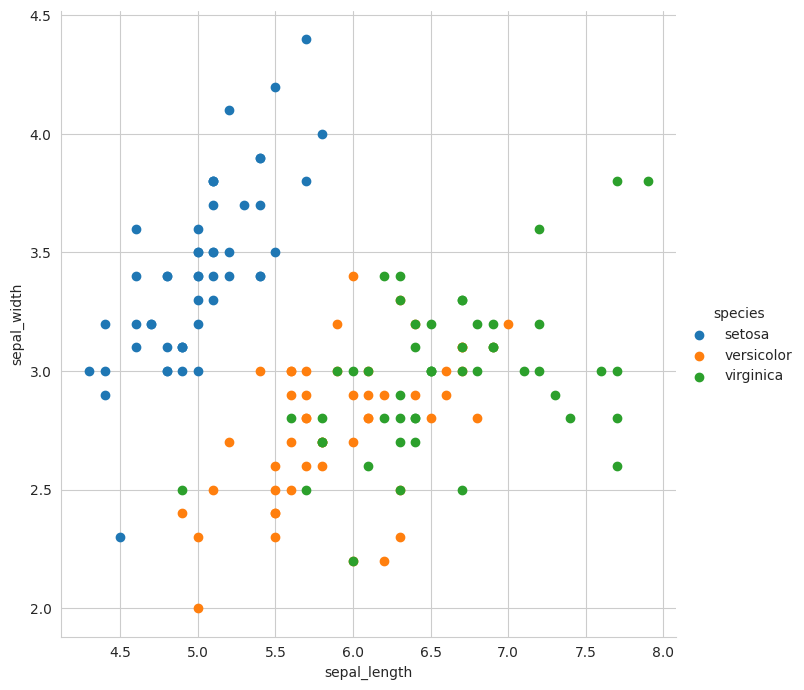

In [12]:
import seaborn as sns

sns.set_style('whitegrid');
sns.FacetGrid(data, hue = 'species', height = 7) \
  .map(plt.scatter, 'sepal_length','sepal_width')\
  .add_legend()

plt.show()

# the blue points are away from the red and green.
# blue point is easily seperable
#


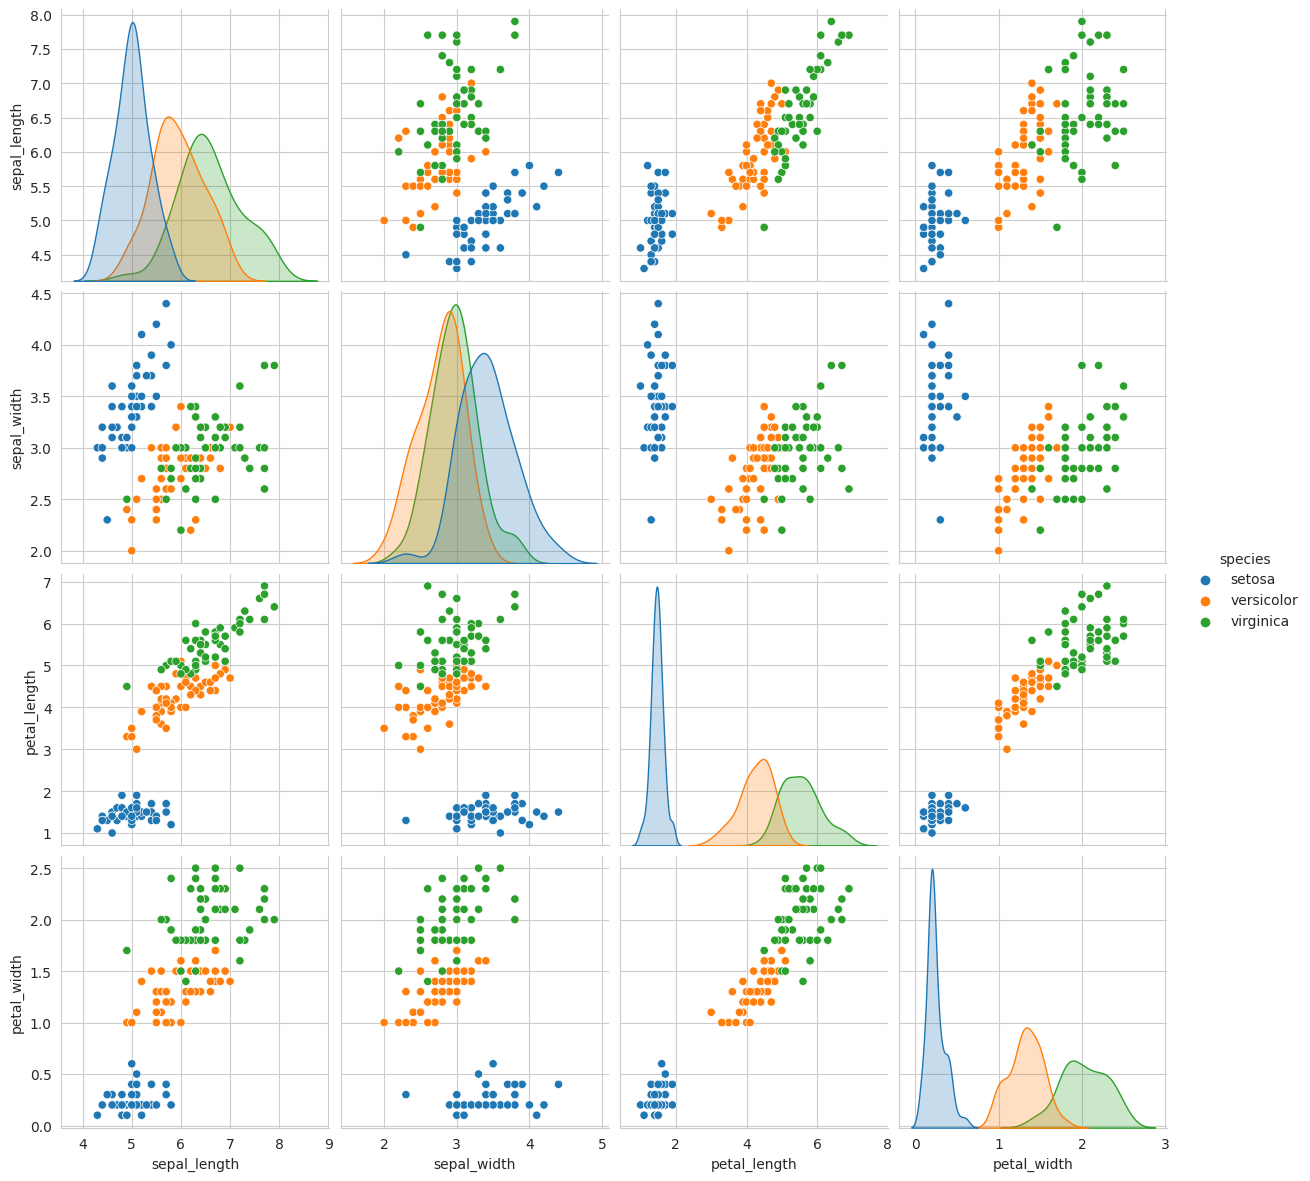

In [13]:
# pair plot.

sns.pairplot(data, hue = 'species', size = 3);
plt.show()


### Univariate Analysis using PDF


Density plot-Setosa has highest density of sepal length
Virginica -

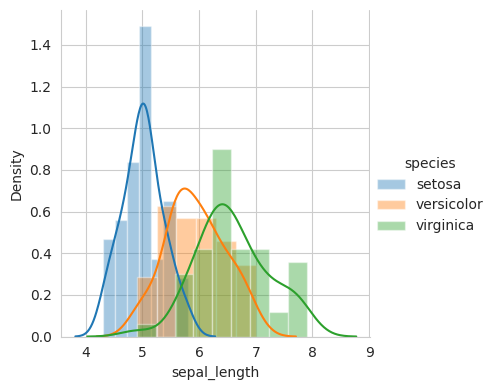

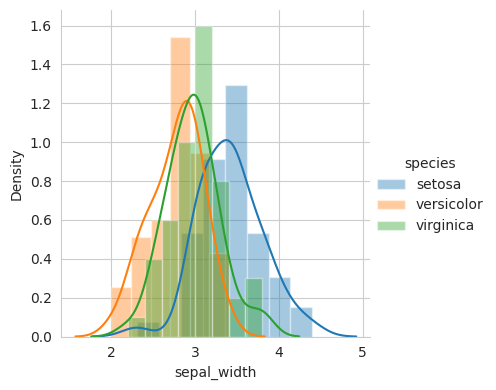

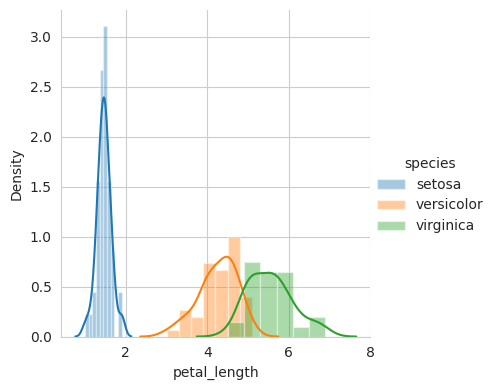

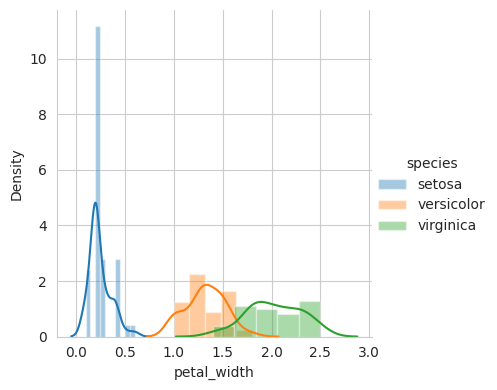

In [14]:
for name in data.columns.values[:-1]:
  sns.FacetGrid(data, hue = 'species',height = 4).map(sns.distplot, name).add_legend()
plt.show()


<Axes: >

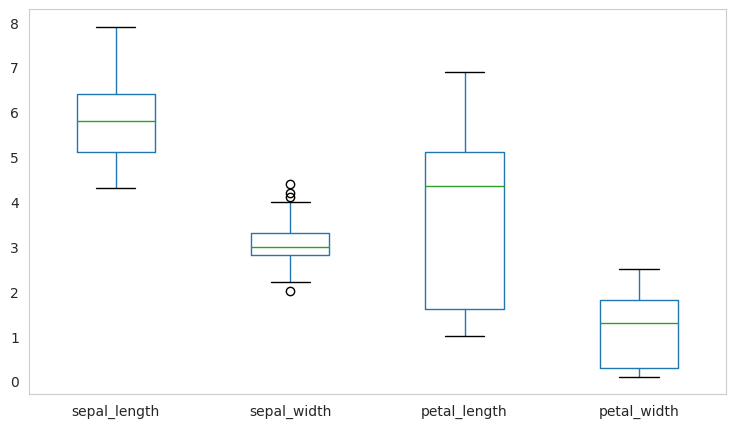

In [15]:

data.boxplot(column = ['sepal_length','sepal_width','petal_length','petal_width'], figsize = (9,5), grid = False)


In [16]:
cat_data = data.select_dtypes(include = 'object')

In [17]:
num_data = data.select_dtypes(include = ['int64', 'float'])

Apply label encoder for Categorical data 'species;

In [18]:
le_data= cat_data.apply(LabelEncoder().fit_transform)

In [19]:
le_data.groupby('species').count()

""
species
0
1
2


concat le_data and num_data columns

In [20]:
data_2= pd.concat([le_data,num_data],axis=1)

Correlated data for all features

In [21]:
corr=data_2.corr()

<Axes: >

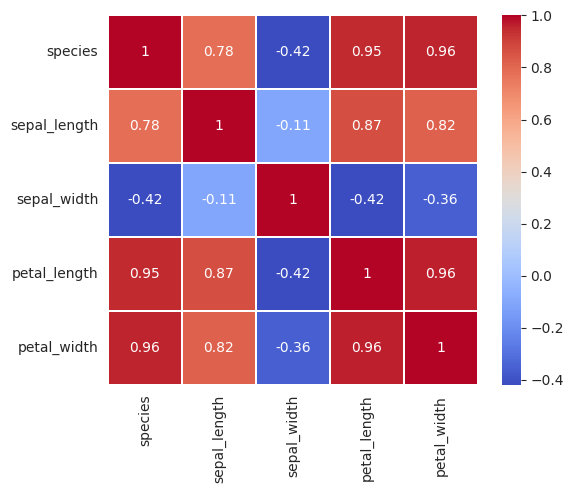

In [22]:
import seaborn as sns
sns.heatmap(corr,linecolor="white",cmap='coolwarm',annot=True,linewidths=.1,xticklabels="auto",yticklabels="auto",square=True)

In [23]:
from sklearn import preprocessing
lb_en = preprocessing.LabelEncoder()
data['species'] = lb_en.fit_transform(data['species'])

In [24]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
corr = data.corr()

In [26]:
corr

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


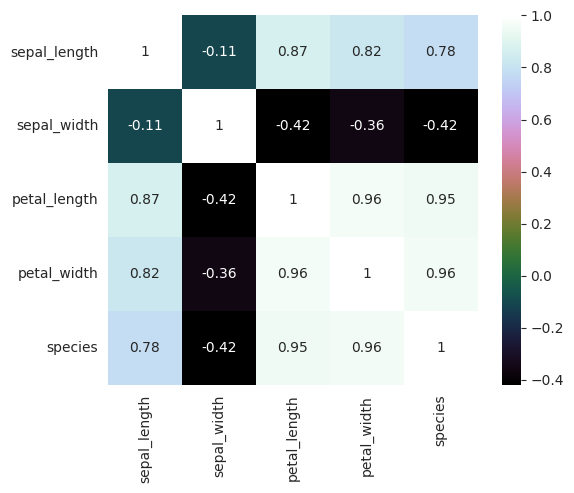

In [27]:
sns.heatmap(corr,annot = True, cmap= 'cubehelix', square = True)
plt.show()

In [84]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.20, random_state=1)


In [85]:
train_x = train.drop(['species'], axis = 1)
train_y = train['species']

test_x = test.drop(['species'], axis = 1)
test_y = test['species']

In [87]:
test_y.shape

(30,)

In [29]:
# create new data file name data_1 = and split the data in X, y
# then apply train test split
data_1 = data.copy()

In [ ]:
data_1.head()

In [41]:
data_1.columns
#sepal_length','sepal_width','petal_length','petal_width'])


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [43]:
X = data_1.drop(['species'],axis=1)

In [55]:
y=data_1['species']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .20,random_state=1)


In [59]:
y_test.shape

(30,)

In [60]:
y_train.shape

(120,)

In [61]:
X_train.shape

(120, 4)

In [71]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [72]:
y_pred = KNN.predict(X_test)

In [73]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

In [66]:
y_pred_1 = KNN.predict_proba(X_test)

In [68]:
y_pred_1

array([[1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.8, 0.2],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.6, 0.4],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.4, 0.6]])

In [74]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_pred,y_test)*100,2))

100.0


In [75]:
train_acu = []
test_acu = []

for k in range(1,16):
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(X_train,y_train)

  train_pred = KNN.predict(X_train)
  train_score = accuracy_score(train_pred,y_train)
  train_acu.append(train_score)

  test_pred = KNN.predict(X_test)
  test_score = accuracy_score(test_pred, y_test)
  test_acu.append(test_score)

print(train_acu,test_acu)




[1.0, 0.975, 0.95, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9666666666666667, 0.9833333333333333, 0.975, 0.975, 0.975, 0.9666666666666667, 0.975, 0.975, 0.975] [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]


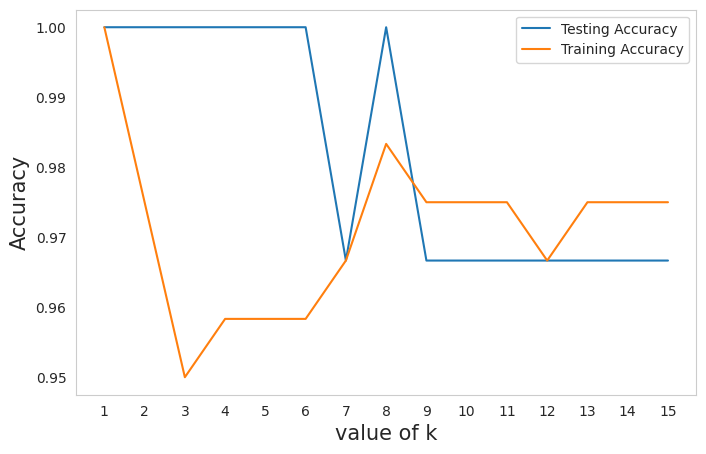

In [78]:
## Accuracy Plot
plt.figure(figsize = (8,5))
plt.plot(range(1,16), test_acu, label = 'Testing Accuracy')
plt.plot(range(1,16), train_acu, label = 'Training Accuracy')
plt.legend()
plt.xlabel('value of k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.xticks(range(1,16))
plt.grid()

After 9, test and train are getting parallel, more stable.

In [90]:
from sklearn.model_selection import GridSearchCV

knn_param = {'n_neighbors':list(range(1,16,1)), 'metric':['euclidean', 'manhattan','minkowski']}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_param, cv = 5)

grid_knn.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]})

In [91]:
# KNNbest hyperparamter
knn_besthypr = grid_knn.best_estimator_
knn_besthypr

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [94]:
knn = knn_besthypr.fit(train_x,train_y)
y_pred = knn.predict(test_x)
acc = accuracy_score(y_pred, test_y)
print(knn_besthypr.n_neighbors,round(acc*100,2))

11 96.67


# Naive Bayes

multinomial,bernaouli t

In [95]:
from sklearn.naive_bayes import GaussianNB
nvclassifier  = GaussianNB()
nvclassifier.fit(train_x, train_y)

GaussianNB()

In [96]:
y_pred = nvclassifier.predict(test_x)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [98]:
test = test.reset_index(drop = True)
test['pred_species'] = y_pred
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species,pred_species
0,5.8,4.0,1.2,0.2,0,0
1,5.1,2.5,3.0,1.1,1,1
2,6.6,3.0,4.4,1.4,1,1
3,5.4,3.9,1.3,0.4,0,0
4,7.9,3.8,6.4,2.0,2,2


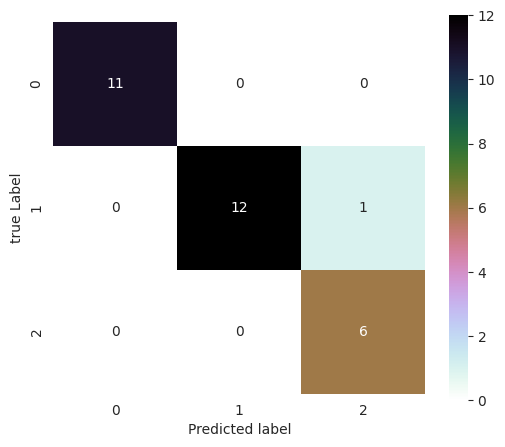

In [101]:
# Confudion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y,y_pred)
plt.figure(figsize = (6,5))
sns.heatmap(cm,annot = True,cmap= 'cubehelix_r', square = True)
plt.ylabel('true Label')
plt.xlabel('Predicted label')
plt.show()

In [105]:
## Findin accuracy from confusion matrix

a = cm.shape
a
corrpred = 0
falsepred = 0
for row in range(a[0]):
  for c in range(a[1]):
    if row ==c:
      corrpred += cm[row,c]
    else:
      falsepred += cm[row,c]

print("*"*70)
print('Correct predictions:', corrpred)
print('False Predictions', falsepred)
print("*"*70)

acc = corrpred/cm.sum()

print(round(acc*100,2))

**********************************************************************
Correct predictions: 29
False Predictions 1
**********************************************************************
96.67


In [107]:
# predicted probabiliy
nvclassifier.predict_proba(test_x)[:10]

array([[1.00000000e+000, 3.01739516e-018, 1.53118902e-024],
       [3.05598742e-033, 9.99999502e-001, 4.98058088e-007],
       [5.17644638e-105, 9.76597403e-001, 2.34025973e-002],
       [1.00000000e+000, 3.16379020e-016, 4.67082360e-023],
       [2.31269079e-283, 5.03077516e-010, 9.99999999e-001],
       [5.19710784e-128, 5.19388953e-001, 4.80611047e-001],
       [3.11677119e-202, 2.89519883e-007, 9.99999710e-001],
       [1.00000000e+000, 4.71892246e-012, 7.61990096e-019],
       [1.00000000e+000, 9.76705815e-017, 1.02169040e-023],
       [8.04323483e-243, 6.93030474e-009, 9.99999993e-001]])